
		       TASK 1

The iPhone was placed on its back, face/display up



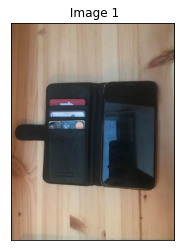



This is 49.9 seconds of the data represented as a graph



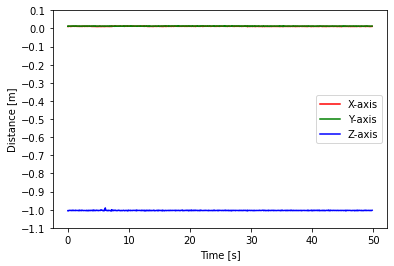

Earths gravitational acceleration is:  1.00 g
Which translates to approximately 9.83 m/s^2



In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

                                        ### TASK 1 ###

#TODO:


SAMPLE_FREQ = 25

# Definition of the average of a list
def Average(lst): 
    return sum(lst) / len(lst) 

# Put the acceleration data in a data frame 
t1_df = pd.read_csv('Task1.csv', sep = ";")

print('\n\t\t       TASK 1\n')
print('The iPhone was placed on its back, face/display up\n')

img1 = np.uint8(mpimg.imread('Task1.jpg'))
# Display the image
plt.title(' Image 1')
fig = plt.imshow(img1)
# Remove the axis
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

# The phone was placed the table with its face up
# which means that g should be measurable on the (negative) Z axis
# according to #https://developer.apple.com/documentation/coremotion/getting_raw_accelerometer_events

x = t1_df['AccelerationX'].values
y = t1_df['AccelerationY'].values
z = t1_df['AccelerationZ'].values
t = t1_df['Timestamp'].values

#Here we set the crop/slice values MAX 3000
start = 1
stop = 1000

# Subtract the first element and add the start value (divided by the sample freq) 
# to start time at 0 since data is 'sliced'
firstEl = t[0] + start/SAMPLE_FREQ
timeMumbo = np.array(t)
timeInS = timeMumbo-firstEl

#Get the time difference
deltaT = t[stop]-t[start]

#Print the three axis data on a graf
print('\n\nThis is ' + str(format(deltaT, '.1f')) + ' seconds of the data represented as a graph\n')
line1, = plt.plot(timeInS[start:stop], x[start:stop], 'r', label='X-axis') 
line2, = plt.plot(timeInS[start:stop], y[start:stop], 'g', label='Y-axis')
line3, = plt.plot(timeInS[start:stop], z[start:stop], 'b', label='Z-axis')
#Scale the Y axis to make sense of the data
plt.yticks(np.arange(-1.1, 0.1, .1))
#Add some legends for the reader to easily follow
plt.legend(handles=[line1, line2, line3])
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.show()

#The iPhone reads the acceleration on the Z-axis as -1 and since the raw data is presented as g (according to the same article)
#the readings conclude that the iphone is experiencing one g on the negative Z direction and that is correct 

z_values = t1_df['AccelerationZ'].values
x_values = t1_df['AccelerationX'].values
y_values = t1_df['AccelerationY'].values

z_values_cropped = z_values[start:stop]
x_values_cropped = x_values[start:stop]
y_values_cropped = y_values[start:stop]

averageZ = Average(z_values_cropped)
averageX = Average(x_values_cropped)
averageY = Average(y_values_cropped)

#https://www.quora.com/How-do-I-calculate-total-acceleration-from-the-x-y-and-z-g-force-values-given-by-an-accelerometer
ABSaverageG = math.sqrt(averageZ**2 + averageX**2 + averageY**2)

print("Earths gravitational acceleration is: ", format(ABSaverageG, '.2f'), 'g')
print("Which translates to approximately 9.83 m/s^2\n")



			  TASK 2


The Pitch is here defined as the angle on the x-axis, where as the roll is defined as the angle on the y axis

Laying Down, Face Up

Pitch =  0.93 °
roll =  -1.05 °

iPhone position [g]:


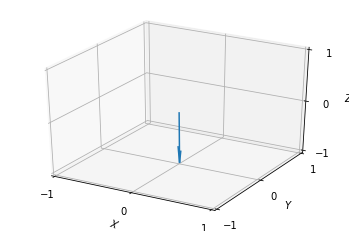


Laying Down, Face Down

Pitch =  -0.75 °
roll =  -0.75 °

iPhone position [g]:


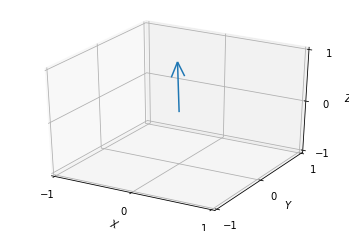


Standing Up

Pitch =  -0.50 °
roll =  -85.85 °

iPhone position [g]:


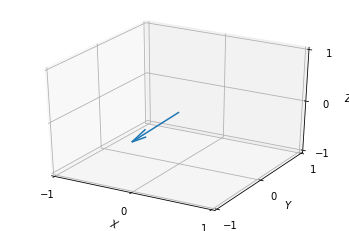


Standing Upside Down

Pitch =  1.56 °
roll =  87.34 °

iPhone position [g]:


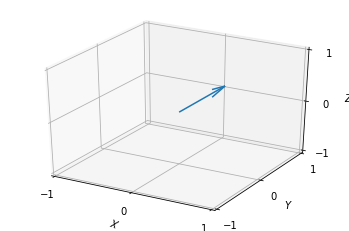


Laying on the Left Side

Pitch =  86.06 °
roll =  -0.77 °

iPhone position [g]:


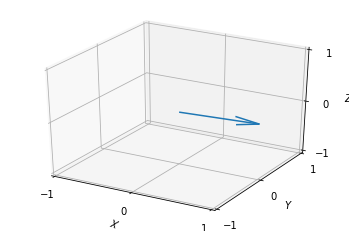


Laying on the Right Side

Pitch =  -88.55 °
roll =  1.37 °

iPhone position [g]:


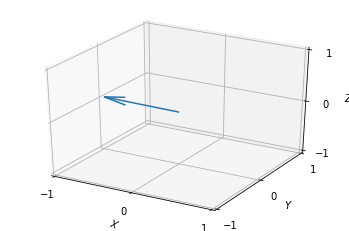

In [2]:
                                        ### TASK 2 ###

import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D


#TODO:
#Remove two positions with only one active axis and add the two angled position
#Image of each position
#Remove vector or better explain it

print('\n\t\t\t  TASK 2\n')

print('\nThe Pitch is here defined as the angle on the x-axis,'+
      'where as the roll is defined as the angle on the y axis')

pos = [1,2,3,4,5,6]

for x in pos:
    if x == 1:
        positioncsv = pd.read_csv('FaceUp.csv', sep = ";")
        print('\nLaying Down, Face Up\n')
    elif x == 2:
        positioncsv = pd.read_csv('FaceDown.csv', sep = ";")
        print('\nLaying Down, Face Down\n')
    elif x == 3:
        positioncsv = pd.read_csv('StandUp.csv', sep = ";")
        print('\nStanding Up\n')
    elif x == 4:
        positioncsv = pd.read_csv('UpsideDown.csv', sep = ";")
        print('\nStanding Upside Down\n')
    elif x == 5:
        positioncsv = pd.read_csv('LeftSide.csv', sep = ";")
        print('\nLaying on the Left Side\n')
    elif x == 6:
        positioncsv = pd.read_csv('RightSide.csv', sep = ";")
        print('\nLaying on the Right Side\n')

    x_values = positioncsv['AccelerationX'].values
    y_values = positioncsv['AccelerationY'].values
    z_values = positioncsv['AccelerationZ'].values
        
    averageX = Average(x_values)
    averageY = Average(y_values)
    averageZ = Average(z_values)
    
    #Equation to get the pitch and roll
    #is defined and explained in https://www.nxp.com/files-static/sensors/doc/app_note/AN3461.pdf
    #It cannot detect yaw https://docs.idew.org/code-internet-of-things/references/physical-inputs/accelerometer
    #a magnetometer could be used to compensate, where the yaw could be calculated due to the magnetic poles of earth
    pitch = math.degrees(math.atan(averageX/math.sqrt(averageY**2 + averageZ**2)))
    roll = math.degrees(math.atan(averageY/math.sqrt(averageX**2 + averageZ**2)))
    #yaw = math.degrees(math.atan(math.sqrt(averageX**2 + averageY**2)/averageZ)) #not posible with only accelerometer
    
    print('Pitch = ', format(pitch, '.2f'), '°')
    print('roll = ', format(roll, '.2f'), '°')
    print('\niPhone position [g]:')
    
    soa = np.array([[0,0,0,averageX, averageY, averageZ]])
    
    X, Y, Z, U, V, W = zip(*soa)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, U, V, W)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('$X$', fontsize=10, rotation=160)
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$Z$', fontsize=10)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    ax.zaxis.set_tick_params(labelsize=10)
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_zticks([-1, 0, 1])
    plt.show()




			  TASK 3


The Phone is now moved 10 cm in the negative Y-direction 5 times


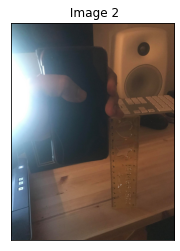


Sample nr  1 

Acceleraion


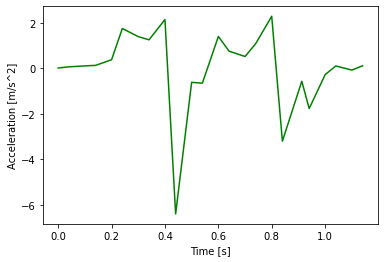


Velocity


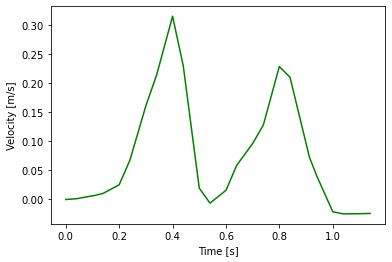


Distance


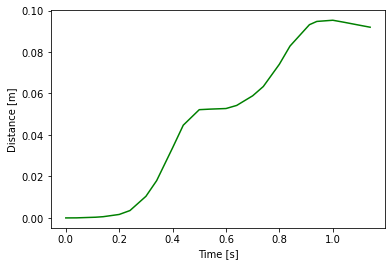


Sample nr  2 

Acceleraion


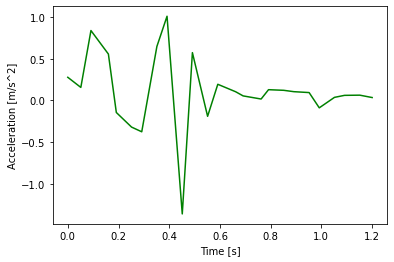


Velocity


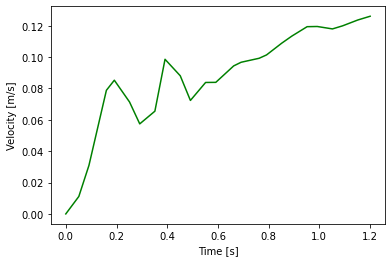


Distance


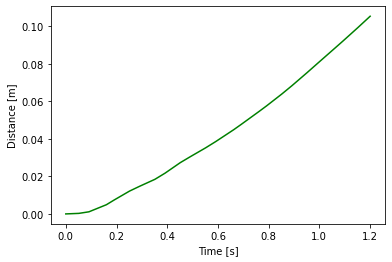


Sample nr  3 

Acceleraion


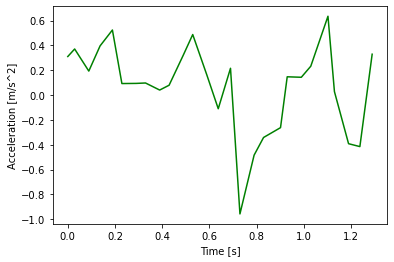


Velocity


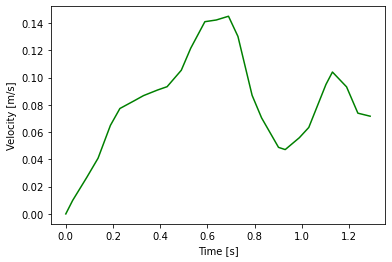


Distance


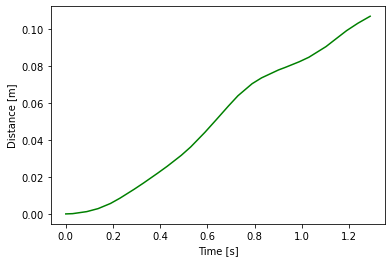


Sample nr  4 

Acceleraion


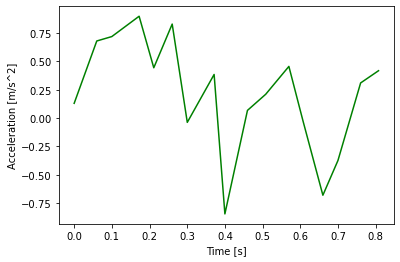


Velocity


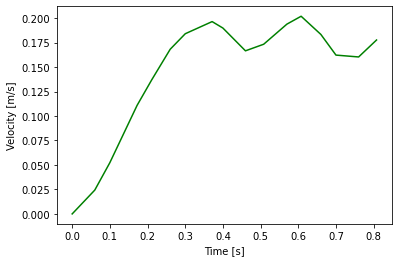


Distance


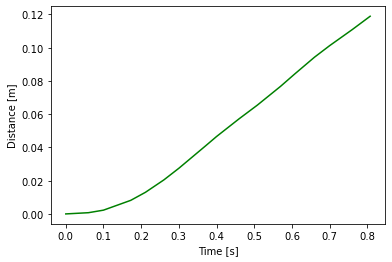

In [284]:
                        #TASK 3
    
from scipy import integrate
    
#TODO:
#Add images of the experiment
#If the sensor data is re-recorded sideways instead of downwards, 
#only the Y-axis would be of interest and would show better results
#Find best start and stop values

#Necessary?
#Research moving average filter and the no movement state calibration:
#https://www.nxp.com/docs/en/application-note/AN3397.pdf
#Look at software design considerations

print('\n\t\t\t  TASK 3\n')

print('\nThe Phone is now moved 10 cm in the negative Y-direction 5 times')

img1 = np.uint8(mpimg.imread('Y10cm.jpg'))
# Display the image
plt.title(' Image 2')
fig = plt.imshow(img1)
# Remove the axis
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

#The gravitational constant
g = 9.83

#Create a list with numbers 1 to 5
pos = range(1, 5)

#Loop through the data
for x in pos:
    if x == 1:
        sample = pd.read_csv('-Y10cm1.csv', sep = ";")
        start = 13
        stop = 37
    elif x == 2:
        sample = pd.read_csv('-Y10cm2.csv', sep = ";")
        start = 20
        stop = 45
    elif x == 3:
        sample = pd.read_csv('-Y10cm3.csv', sep = ";")
        start = 13
        stop = 40
    elif x == 4:
        sample = pd.read_csv('-Y10cm4.csv', sep = ";")
        start = 8
        stop = 25
    elif x == 5:
        sample = pd.read_csv('-Y10cm5.csv', sep = ";")
        start = 25
        stop = 40
 
    #Entire data. Comment out if data cropped
    #start = 0
    #stop = sample.size
    
    #Grab the data from each direction columns and the time column
    print('\nSample nr ',pos[x-1],'\n')
    ax = sample['AccelerationX'].values
    ay = sample['AccelerationY'].values
    az = sample['AccelerationZ'].values
    t = sample['Timestamp'].values

    #Turn the desired part of the data (the actual movement) into an np array 
    ax_np = np.array(ax[start:stop])
    ay_np = np.array(ay[start:stop])
    az_np = np.array(az[start:stop])
    t_np  = np.array(t[start:stop])
    
    #Subtract the first element of the time column to start time from 0
    firstEl = t_np[0]  
    timeMumbo = np.array(t_np)
    t_np2 = timeMumbo-firstEl

    #Offset the Y-axis by removing one g from y, by adding 1g because of the direction
    #since the phone was moved in the negative Y-direction in the same direction as g
    ay_np = ay_np + 1
    
    #Multiply by g to get the correct m/s^2 unit
    ax_np = ax_np * g
    ay_np = ay_np * g
    az_np = az_np * g

    print('Acceleraion')
    plt.plot(t_np2, ay_np, 'g')
    plt.xlabel('Time [s]')
    plt.ylabel('Acceleration [m/s^2]')
    plt.show()
    
    #lets integrate the acceleration to get the velocity:   
    vy_np = integrate.cumtrapz(ay_np, t_np2, initial=0)
    
    print('\nVelocity')
    plt.plot(t_np2, vy_np, 'g')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')
    plt.show()
    
    #Now lets integrate the velocity vector to get the distance vector:
    #x_np = integrate.cumtrapz(vx_np, t_np2, initial=0)
    y_np = integrate.cumtrapz(vy_np, t_np2, initial=0)
    #z_np = integrate.cumtrapz(vz_np, t_np2, initial=0)
    
    print('\nDistance')
    plt.plot(t_np2, y_np, 'g')
    plt.xlabel('Time [s]')
    plt.ylabel('Distance [m]')
    plt.show()
    
    #Conclusion:
    #Due two the double integration, the error increases by the square
    #Too slow movement could therefore show an incorrect distance moved
    #Too fast movements contains less data and is therefore unreliable
    #For best results, the data should be cropped to fit the movement before any integration


In [179]:
                        #TASK 4
    #TODO
    #Everything lol


 Crude_Oil Historical Data From 2000-08-31  To 2020-07-09 


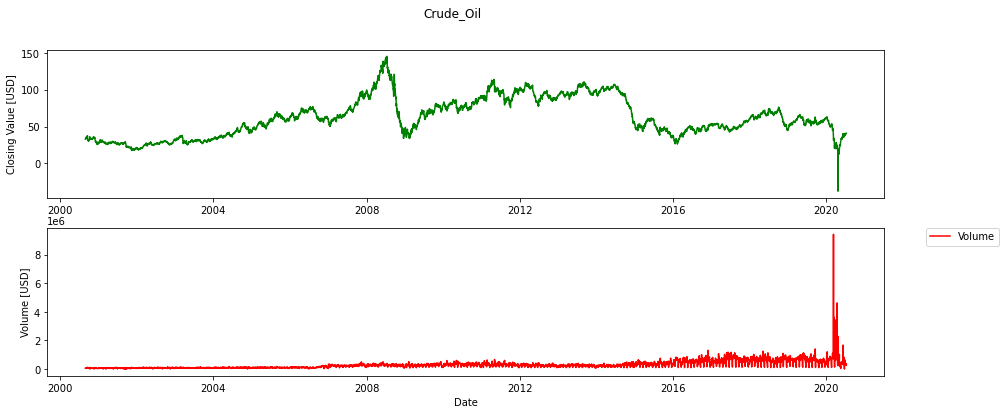


 Gold Historical Data From 2000-08-31  To 2020-07-09 


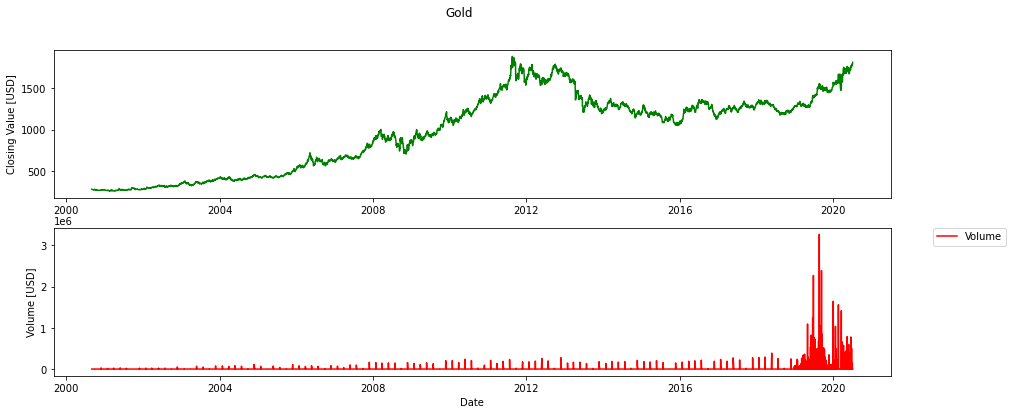


 Silver Historical Data From 2000-08-31  To 2020-07-09 


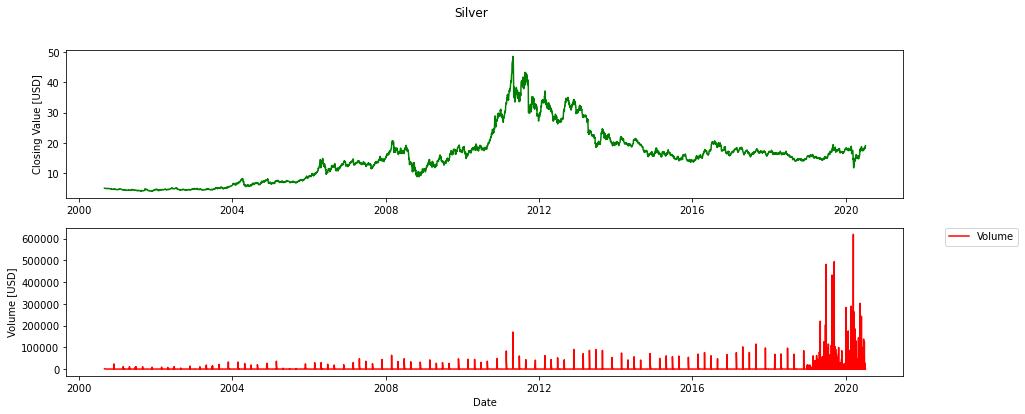

----------------------------------------------------------------------------------------------------

The correlation of gold close and volume is  0.11 which suggests hardly any positive correlation
The correlation of crude oil close and volume is  0.05 which suggests hardly any positive correlation
The correlation of gold and crude oil close is  0.53 which suggests a weak positive correlation
The correlation of gold and crude oil volume is  0.12 which suggests hardly any positive correlation


The correlation of silver close and volume is  0.04 which suggests hardly any positive correlation
The correlation of gold and silver close is  0.87 which suggests a strong positive correlation
The correlation of gold and silver volume is  0.00 which suggests hardly any positive correlation


The correlation of crude oil and silver close is  0.71 which suggests a weak positive correlation
The correlation of crude oil and silver volume is  0.08 which suggests hardly any positive correlation
-----

In [236]:
                        #TASK 5
    
#Stock 1: Gold (GC=F)
#Stock 2: Crude Oil (CL=F)
#Stock 3: Silver (SI=F)

import matplotlib.dates as mdates
from pathlib import Path


#Decide the correlation according to the definition in
#https://www.investopedia.com/terms/c/correlationcoefficient.asp
def correlationVerdict(corr):
    
    #First check if error or no correlation
    if corr > 1 or corr < -1:
        verdict = "Error in measurment"
        return verdict
    elif abs(corr) < 0.0:
        verdict = "no correlation"
        return verdict
    else:
    
        if corr < 0: #correlation is negative
            sign = "negative"
        else: #correlation is positive
            sign = "positive"
    
    #Take the absolute value of the correlation coefficient (since we already know the sign)
    corr = abs(corr)
    
    #'\033[1m' to make it bold and '\033[0m' back from bold. Just to make it stick out
    if corr == 1:
        verdict = '\033[1m' + "a perfect " + '\033[0m' + sign + " correlation"
    elif corr >= 0.9:
        verdict = '\033[1m' + "a very strong " + '\033[0m' + sign + " correlation"
    elif corr >= 0.8:
        verdict = '\033[1m' + "a strong " + '\033[0m' + sign + " correlation"
    elif corr >= 0.5:
        verdict = "a weak " + sign + " correlation"  
    elif corr >= 0.2:
        verdict = "a very weak " + sign + " correlation"
    elif corr > 0.0:
        verdict = "hardly any " + sign + " correlation"
        
    return verdict 

#Plot the close and volume of the different stocks
pos = range(1, 4)
for x in pos:
    if x == 1:
        stock = pd.read_csv('Crude_Oil.csv', sep = ",", parse_dates=[0], index_col=0)
        #drop all nan (i.e weekends)
        stock = stock.dropna()
        stockName = Path('Crude_Oil.csv')
        #save the stock data with a specific name, so to be easily comparable
        crudeOil = stock
        oilClose = crudeOil['Close'].values
        oilVolume = crudeOil['Volume'].values
    elif x == 2:
        stock = pd.read_csv('Gold.csv', sep = ",", parse_dates=[0], index_col=0)
        stock = stock.dropna()
        stockName = Path('Gold.csv')
        gold = stock
        goldClose = gold['Close'].values
        goldVolume = gold['Volume'].values
    elif x == 3:
        stock = pd.read_csv('Silver.csv', sep = ",", parse_dates=[0], index_col=0)
        stock = stock.dropna()
        stockName = Path('Silver.csv')
        silver = stock
        silverClose = silver['Close'].values
        silverVolume = silver['Volume'].values

    #Grab only the values
    close = stock['Close'].values
    volume = stock['Volume'].values

    #Choose start and stop values
    start = 0
    stop = close.size - 59

    #crop the data according to start and stop values
    croppedClose = close[start:stop]
    croppedVolume = volume[start:stop]

    #Information about the current plot
    print('\n',stockName.stem ,'Historical Data From',
          str(stock.index[start]).rstrip("00:00:00"),'To',str(stock.index[stop]).rstrip("00:00:00"))
    
    #Create a vertical subplot with the current stock close value and volume over time 
    fig, (closeAx,volAx) = plt.subplots(2,figsize=(15,6))
    fig.suptitle(stockName.stem)
    plt.xlabel('Date')
    closeAx.set(ylabel='Closing Value [USD]')
    volAx.set(ylabel='Volume [USD]')
    line1, = closeAx.plot(stock.index[start:stop], croppedClose, 'g', label = 'Close')
    line2, = volAx.plot(stock.index[start:stop], croppedVolume, 'r', label = "Volume")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

print('-' * 100)

#Calculate and print the possible correlation of each dataset combination
for x in pos:
    if x == 1:
        stock1_close = goldClose
        stock1_volume = goldVolume
        stock1_name = 'gold'
        
        stock2_close = oilClose
        stock2_volume = oilVolume
        stock2_name = 'crude oil'
    elif x == 2:
        stock2_close = silverClose
        stock2_volume = silverVolume
        stock2_name = 'silver'
    elif x == 3:
        stock1_close = oilClose
        stock1_volume = oilVolume
        stock1_name = 'crude oil'

    r = np.corrcoef(stock1_close[start:stop], stock1_volume[start:stop])
    r2 = np.corrcoef(stock2_close[start:stop], stock2_volume[start:stop])
    rc = np.corrcoef(stock1_close[start:stop], stock2_close[start:stop])
    rv = np.corrcoef(stock1_volume[start:stop], stock2_volume[start:stop])
    
    if x == 1:
        print('\nThe correlation of ' + stock1_name + ' close and volume is ',
              format(r[1,0], '.2f'), "which suggests", correlationVerdict(r[1,0]))
    else:
        print('\n')
    if x != 3:    
        print('The correlation of ' + stock2_name + ' close and volume is ',
              format(r2[1,0], '.2f'), "which suggests", correlationVerdict(r2[1,0]))
    print('The correlation of ' + stock1_name + ' and ' + stock2_name + ' close is ',
          format(rc[1,0], '.2f'), "which suggests", correlationVerdict(rc[1,0]))
    print('The correlation of ' + stock1_name + ' and ' + stock2_name + ' volume is ',
          format(rv[1,0], '.2f'), "which suggests", correlationVerdict(rv[1,0]))

print('-' * 100)

print('\n\nThe only strong correlation in the combinations were the gold and silver close values and since they are' +
     '\nprecious metals, it makes sense that they would correlate since the same investors would buy stocks in both.' +
     '\nIt is also clearly visable from the close graphs of both that they indeed do correlate')



			Task 6

			 Gold


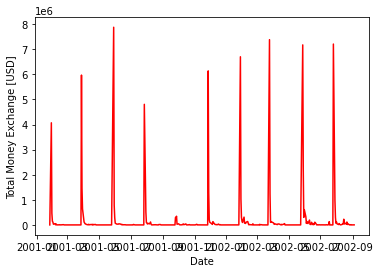

			 Silver


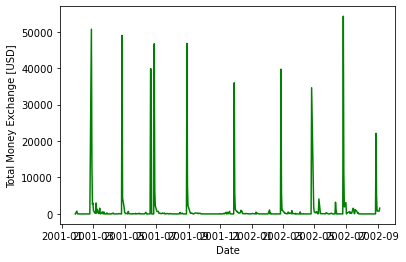

			 Crude Oil


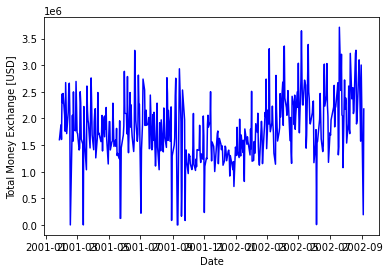

In [241]:
                        #TASK 6

print('\n\t\t\tTask 6\n')

for x in pos:
    
    #Calculate total money exchange:
    if x == 1:
        totalExchange = goldClose[start:stop] * goldVolume[start:stop]
        stockName = 'Gold'
        color = 'r'
    elif x == 2:
        totalExchange = silverClose[start:stop] * silverVolume[start:stop]
        stockName = 'Silver'
        color = 'g'
    elif x == 3:
        totalExchange = oilClose[start:stop] * oilVolume[start:stop]
        stockName = 'Crude Oil'
        color = 'b'
        
    #Create a plot with the current stocks total money exchange 

    print('\t\t\t',stockName)
    plt.xlabel('Date')
    plt.ylabel('Total Money Exchange [USD]')
    plt.plot(stock.index[start:stop], totalExchange , color)
    plt.show()


In [183]:
                        #TASK 7

In [ ]:
                        #TASK 8
    #Stock 4: Bitcoin USD (BTC-USD)
    #Stock 5: Alphabet Inc. (GOOG)
    
    